In [40]:
import pandas as pd
senate = pd.read_csv("../../data/voteview/S111_votes.csv").fillna(0)
mems = pd.read_csv("../../data/voteview/HSall_members.csv").set_index("icpsr")

def vote_type(v):
    if v in [1,2,3]: return 1
    elif v in [4,5,6]: return -1
    else: return 0

senate["vote"] = senate["cast_code"].transform(vote_type)

In [41]:
senate = senate.pivot(index="icpsr",columns="rollnumber",values="vote").dropna()
senate = senate.join(mems[["party_code"]],how="left").dropna().drop_duplicates()
X = senate.drop("party_code",axis=1)

senate.party_code.value_counts()

100    52
200    39
328     1
Name: party_code, dtype: int64

/Users/driscoll/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


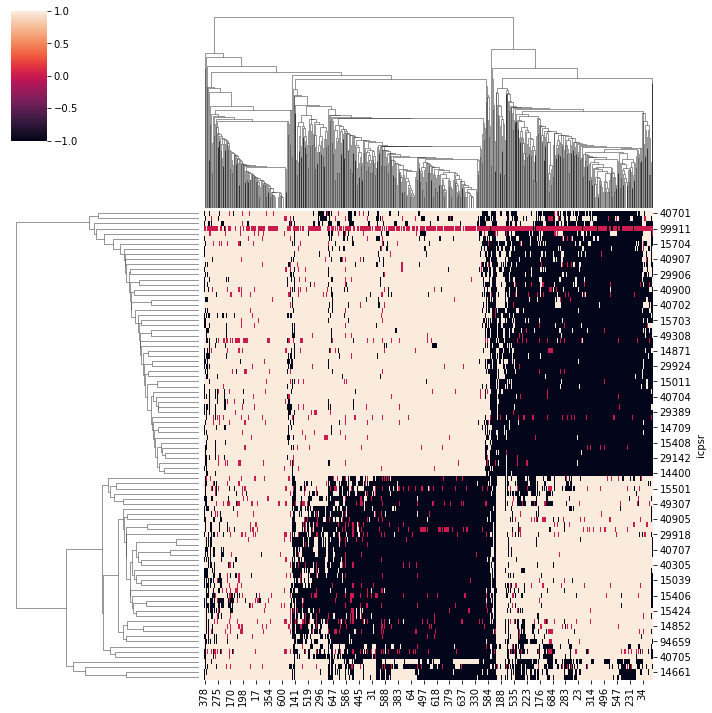

In [42]:
import seaborn as sns
sns.clustermap(X,dendrogram_ratio=(.3,.3),row_cluster=True,col_cluster=True)

In [47]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X)
senate["class"] = agg.labels_
senate["class"].value_counts()

1    53
0    39
Name: class, dtype: int64

In [48]:
from sklearn.metrics import silhouette_samples
senate["sil"] = silhouette_samples(X,agg.labels_)

from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(senate["party_code"],senate["class"])

0.9751591128254581